# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, BatchNormalization, Dropout, ReLU, Add, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

C:\Users\nelia\AppData\Local\Temp\ipykernel_10896\719417838.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


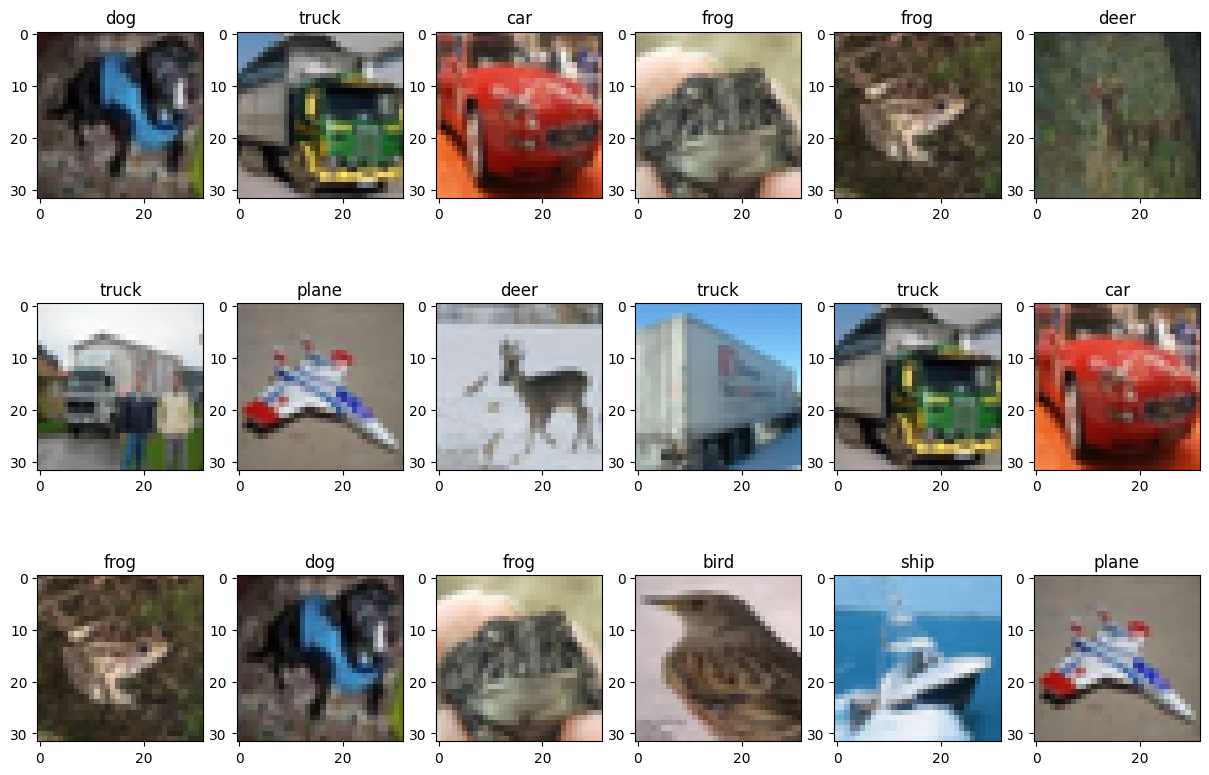

In [45]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(32, 32, 3)
[6]
<class 'numpy.ndarray'>
(50000, 1)
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


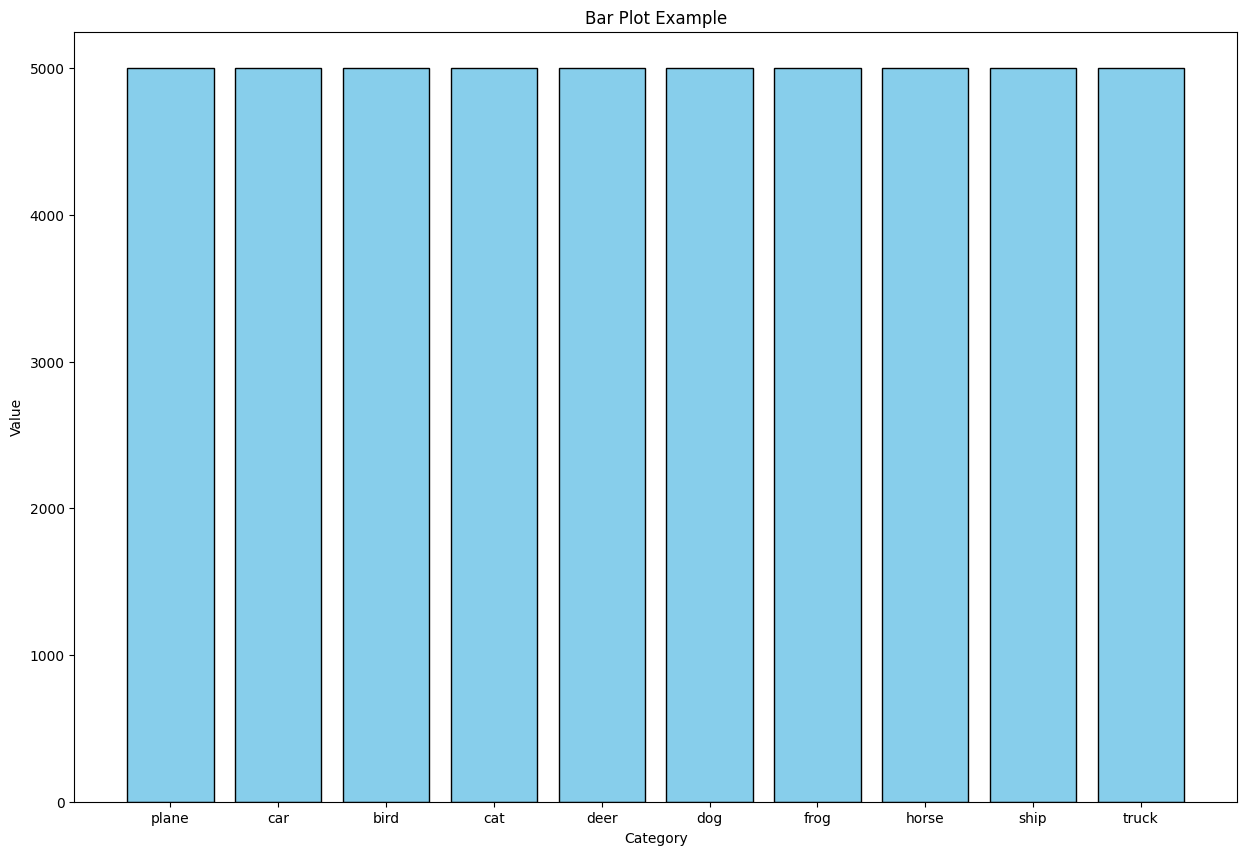

In [46]:
# Compute the class histogram
print(x_train[0].shape)
print(y_train[0])
print(type(y_train))
print(y_train.shape)
# Example data
categories = classes.values()
values = np.bincount(y_train.flatten(), minlength=num_classes)
print(values)

# Plot
plt.bar(categories, values, color='skyblue', edgecolor='black')
plt.title('Bar Plot Example')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

# Classes are completely balanced ! 

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [47]:
# Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encoding
y_train = np.eye(num_classes)[y_train.flatten()]
y_test = np.eye(num_classes)[y_test.flatten()]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

print(x_train[0])

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)
[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334

### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [48]:
# Build the classifier
model =  tf.keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding= 'same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), padding ='same', activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

# Show the model
model.summary()

c:\Users\nelia\OneDrive\Рабочий стол\semester 2\computerVision\.venv_cvis\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [49]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 90ms/step - accuracy: 0.2915 - loss: 1.9273 - val_accuracy: 0.5127 - val_loss: 1.3733
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 100ms/step - accuracy: 0.4780 - loss: 1.4505 - val_accuracy: 0.5679 - val_loss: 1.2349
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.5323 - loss: 1.3061 - val_accuracy: 0.5983 - val_loss: 1.1314
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.5694 - loss: 1.2119 - val_accuracy: 0.6399 - val_loss: 1.0355
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 90ms/step - accuracy: 0.5978 - loss: 1.1355 - val_accuracy: 0.6695 - val_loss: 0.9534
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 96ms/step - accuracy: 0.6178 - loss: 1.0763 - val_accuracy: 0.6764 - val_loss: 0.9317
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.6342 - loss: 1.0343 - val_accuracy: 0.6769 - val_loss: 0.9272
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.6463 - loss: 1.0018 -

Train Acc      0.7623999714851379
Validation Acc 0.7067000269889832


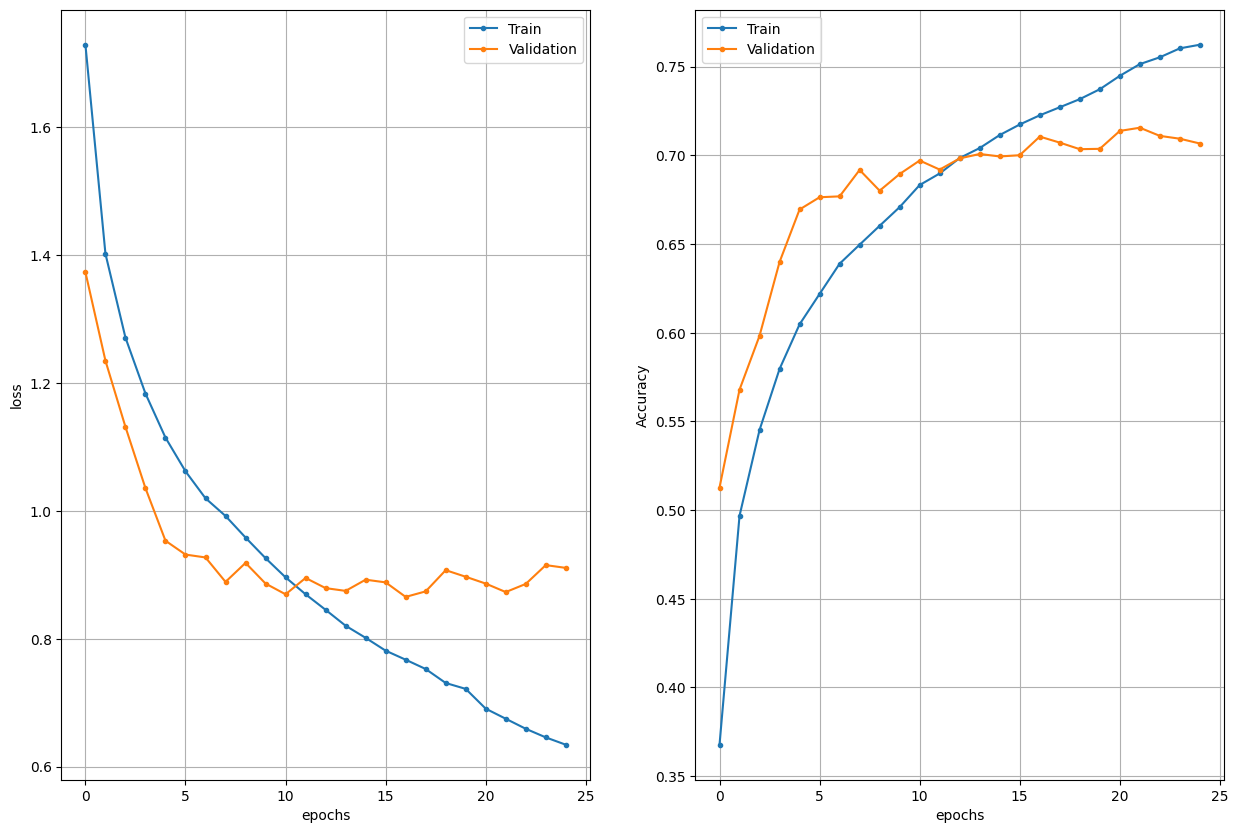

In [57]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [58]:
# Compute the labels and the predictions as sparse values
y_true = y_test.argmax(axis=1)
y_pred = model.predict(x_test).argmax(axis=1)
print(x_test.shape)
print(y_pred.shape)
print(y_true.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
(10000, 32, 32, 3)
(10000,)
(10000,)


In [59]:
# Compute and print the accuracy for each class
print('Average accuracy: ', np.mean(y_true == y_pred))

# get number of correct predictions in each class (incorrect predictions are just 0) and then sum them over the classes
correct_in_class = y_test * np.eye(num_classes)[y_pred]
correct_in_class = correct_in_class.sum(axis=0)

num_in_class = y_test.sum(axis=0)
print(num_in_class)
print(correct_in_class)

accuracy = correct_in_class / num_in_class

for acc, class_name in zip(accuracy, classes.values()):
    
    print(class_name, acc)

# the model predicts only one class correctly (horses)

Average accuracy:  0.7067
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]
[740. 795. 506. 529. 654. 697. 740. 762. 796. 848.]
plane 0.74
car 0.795
bird 0.506
cat 0.529
deer 0.654
dog 0.697
frog 0.74
horse 0.762
ship 0.796
truck 0.848


In [60]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7148 - loss: 0.8953
Test loss   0.910897433757782
Test metric 0.7067000269889832


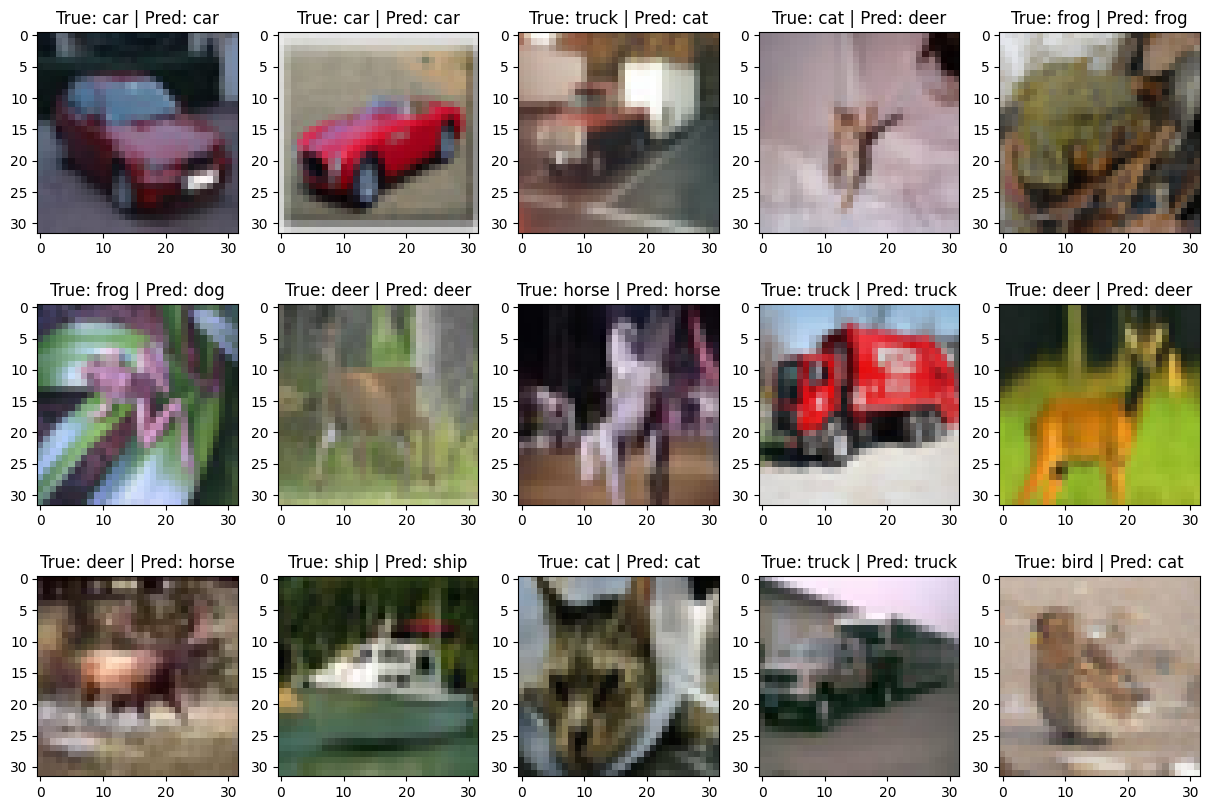

In [61]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

- overall accuracy is 70%
- I could add different regularization techniques (label smoothing, weight decay, dropout, batch normalization), add data augmentation (rotations, cutout), add residual connection (however, this model is not deep, I do not know if this is needed), change learning rate, use pretrained backbone model, change number of channels in cov2d layers, change number of neurons in linear layers, add scheduler to slow down the learning at the end. 
- I tried to implement Batch normalization and residual connectins (which did not work well on such a shallow NN, worse that the simple CNN), also I tried deeper NN with batch norm, residual connections, some regularization, scheduler (reduce lr on plateau) +  early stopping, which was no better that the simpler CNN (72% on the test set).

In [63]:
# add batch norm
model_2 =  tf.keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), padding ='same'),
    BatchNormalization(),
    ReLU(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    ReLU(),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,994 (2.08 MB)

 Trainable params: 545,546 (2.08 MB)

 Non-trainable params: 448 (1.75 KB)

In [66]:
# compile the model
epochs = 25

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history_2 = model_2.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            verbose=1)

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 115s 286ms/step - accuracy: 0.6212 - loss: 1.0830 - val_accuracy: 0.6338 - val_loss: 1.0319
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 100s 257ms/step - accuracy: 0.6817 - loss: 0.9161 - val_accuracy: 0.6873 - val_loss: 0.8973
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 99s 253ms/step - accuracy: 0.7117 - loss: 0.8223 - val_accuracy: 0.6399 - val_loss: 1.1012
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 99s 253ms/step - accuracy: 0.7336 - loss: 0.7641 - val_accuracy: 0.6609 - val_loss: 0.9848
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 97s 247ms/step - accuracy: 0.7537 - loss: 0.7053 - val_accuracy: 0.6666 - val_loss: 0.9974
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 96s 246ms/step - accuracy: 0.7733 - loss: 0.6411 - val_accuracy: 0.6197 - val_loss: 1.1670
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 98s 249ms/step - accuracy: 0.7932 - loss: 0.5911 - val_accuracy: 0.5943 - val_loss: 1.3594
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 99s 253ms/step - accuracy: 0.8047 - loss:

Train Acc      0.9239000082015991
Validation Acc 0.6876000165939331


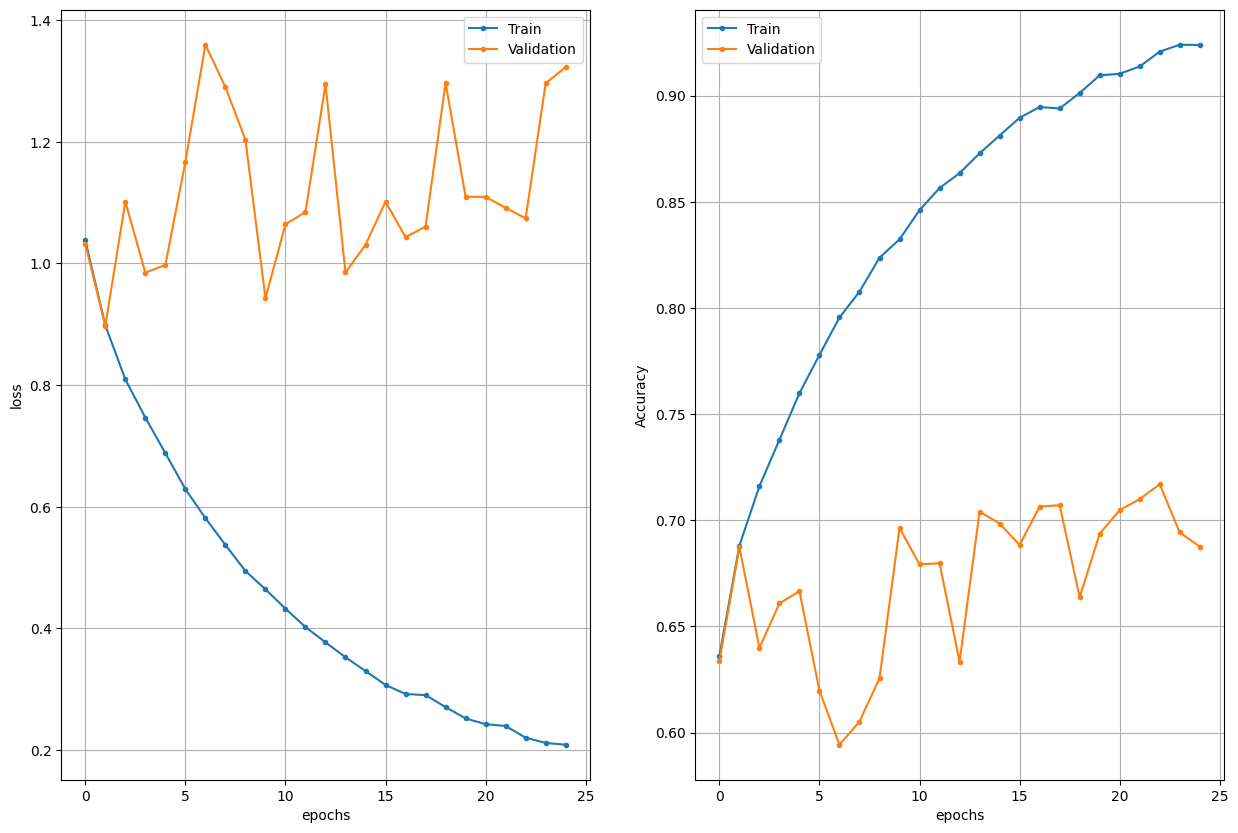

In [67]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history_2.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])  

In [68]:
# evaluate the model 2
y_true = y_test.argmax(axis=1)
y_pred = model_2.predict(x_test).argmax(axis=1)

correct_in_class = y_test * np.eye(num_classes)[y_pred]
correct_in_class = correct_in_class.sum(axis=0)

num_in_class = y_test.sum(axis=0)
accuracy = correct_in_class / num_in_class

for acc, class_name in zip(accuracy, classes.values()):
    
    print(class_name, acc)

ev = model_2.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
plane 0.66
car 0.663
bird 0.555
cat 0.497
deer 0.803
dog 0.507
frog 0.609
horse 0.846
ship 0.858
truck 0.878
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6891 - loss: 1.3250
Test loss   1.3225072622299194
Test metric 0.6876000165939331


In [69]:
from tensorflow.keras.layers import add, GlobalAveragePooling2D

# build a model with residual connections
inputs = Input(shape=(32, 32, 3))

# First conv layer
x = Conv2D(32, (3, 3), padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)

# Residual block
res = x  # Save input to skip connection
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = ReLU()(x)
x = Conv2D(32, (3, 3), padding='same')(x)
x = BatchNormalization()(x)

# Add skip connection
x = add([x, res])
x = ReLU()(x)

# Output layers
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation='softmax')(x)

model_3 = Model(inputs=inputs, outputs=x)

model_3.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │        896 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_9 (ReLU)      │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 32, 32,    │      9,248 │ re_lu_9[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_10 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 32, 32,    │      9,248 │ re_lu_10[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ re_lu_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_11 (ReLU)     │ (None, 32, 32,    │          0 │ add[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ re_lu_11[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 10)        │        330 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,106 (78.54 KB)

 Trainable params: 19,914 (77.79 KB)

 Non-trainable params: 192 (768.00 B)

In [70]:
model_3.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 25

history_3 = model_3.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_test, y_test),
            verbose=1)


Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 182s 458ms/step - accuracy: 0.3069 - loss: 1.9153 - val_accuracy: 0.2211 - val_loss: 2.4071
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 175s 449ms/step - accuracy: 0.4671 - loss: 1.5003 - val_accuracy: 0.3342 - val_loss: 1.8717
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 175s 447ms/step - accuracy: 0.5153 - loss: 1.3633 - val_accuracy: 0.3463 - val_loss: 1.8648
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 178s 454ms/step - accuracy: 0.5411 - loss: 1.2879 - val_accuracy: 0.3390 - val_loss: 2.0778
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 178s 455ms/step - accuracy: 0.5628 - loss: 1.2334 - val_accuracy: 0.4124 - val_loss: 1.6181
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 176s 449ms/step - accuracy: 0.5788 - loss: 1.1891 - val_accuracy: 0.3310 - val_loss: 2.1885
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 176s 449ms/step - accuracy: 0.5923 - loss: 1.1532 - val_accuracy: 0.4161 - val_loss: 1.7317
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 175s 449ms/step - accuracy: 0.6053 -

Train Acc      0.6865599751472473
Validation Acc 0.49939998984336853


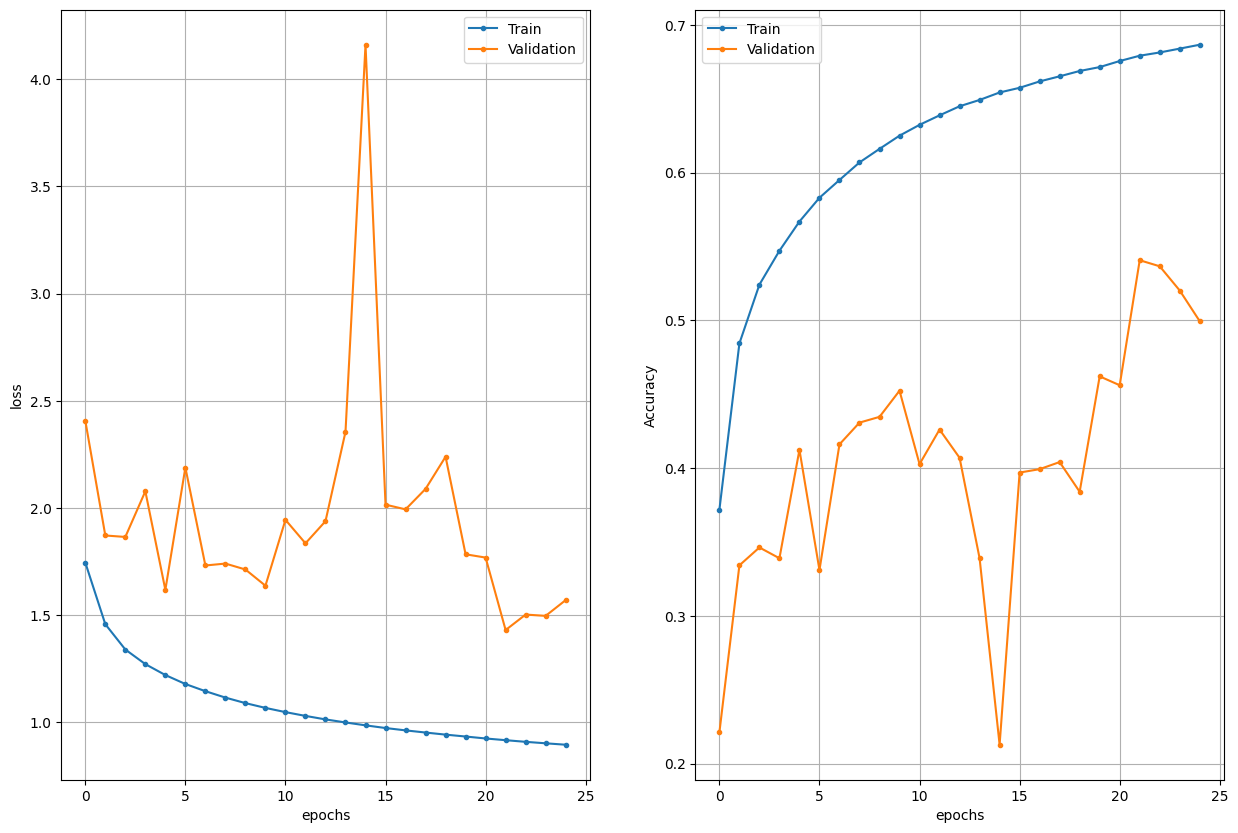

In [71]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history_3.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])  

Residual connection and batch norm didn't make the model performance better. I guess it is so because the model is too shallow for residual connection and batch norm regularize the model too much.   

In [77]:
from tensorflow.keras import regularizers
def residual_block(x, filters):
    res = x
    x = Conv2D(filters, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4))(x)
    x = BatchNormalization()(x)

    if res.shape[-1] != x.shape[-1]:
        res = Conv2D(filters, (1, 1), padding='same')(res)
    x = add([x, res])
    x = ReLU()(x)
    return x

def build_cifar10_model():
    inputs = tf.keras.Input(shape=(32, 32, 3))
    x = Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(1e-4))(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = residual_block(x, 32)
    x = MaxPooling2D()(x)

    x = residual_block(x, 64)
    x = MaxPooling2D()(x)

    x = residual_block(x, 128)
    x = GlobalAveragePooling2D()(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)

    return Model(inputs, outputs)

model_cifar = build_cifar10_model()
model_cifar.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 32, 32,    │        896 │ input_layer_10[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_17 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 32, 32,    │      9,248 │ re_lu_17[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_22[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_18 (ReLU)     │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │      9,248 │ re_lu_18[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        128 │ conv2d_23[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 32, 32,    │          0 │ batch_normalizat… │
│                     │ 32)               │            │ re_lu_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_19 (ReLU)     │ (None, 32, 32,    │          0 │ add_2[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 16, 16,    │          0 │ re_lu_19[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 16, 16,    │     18,496 │ max_pooling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_24[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_20 (ReLU)     │ (None, 16, 16,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 16, 16,    │     36,928 │ re_lu_20[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        256 │ conv2d_25[0][0] 

 Total params: 326,410 (1.25 MB)

 Trainable params: 325,450 (1.24 MB)

 Non-trainable params: 960 (3.75 KB)

In [79]:
model_cifar.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)
]

model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.7428 - loss: 0.6924 - val_accuracy: 0.7036 - val_loss: 0.9126 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.7470 - loss: 0.6763 - val_accuracy: 0.7062 - val_loss: 0.9234 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.7553 - loss: 0.6560 - val_accuracy: 0.7025 - val_loss: 0.9313 - learning_rate: 0.0010
Epoch 4/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7656 - loss: 0.6280
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7656 - loss: 0.6280 - val_accuracy: 0.7084 - val_loss: 0.9205 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.7886 - loss: 0.5683 - val_accuracy: 0.7146 - val_loss: 0.9471 - learning_rate: 5.0000e-04
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.7962 -